Surface coverage of each species under various lambda in algorithm 3 (tau_max = 10^-8)

In [3]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
# plt.rc('text', usetex=True)
from arguments import get_args
args = get_args()
algo="alg3"
lambda_list = ["ssa", "0.001", "0.01", "0.1", "1.0", "10.0", "100.0"] # lambdas
datapath = "alg3_lambdas_data/"
savepath = "24_2_13_alg3_lambdas/"
if not os.path.exists(savepath):
    os.makedirs(savepath)

Namespace(exp_name='nh3', lattice_size=50, sim_round=10000000, num_samples=50, end_time=0.00011, alg1_lambda=0.1, alg2_lambda=0.1, alg3_lambda=0.001, tau_max=1e-08, algo=-1, path='24_1_11/')


plot coverage vs. time for each species and lambdas

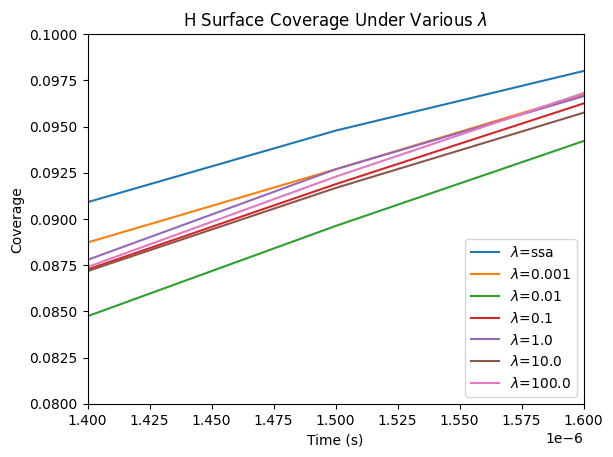

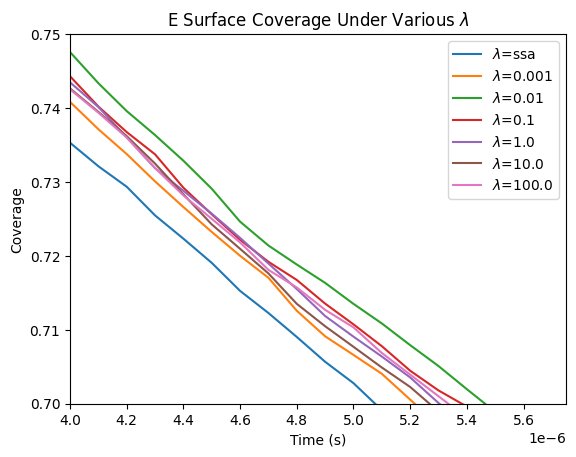

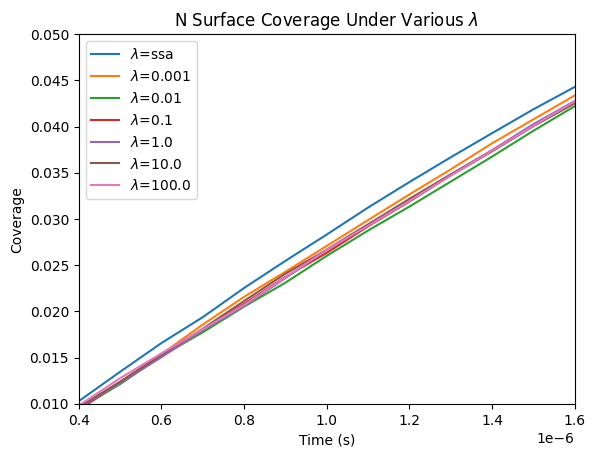

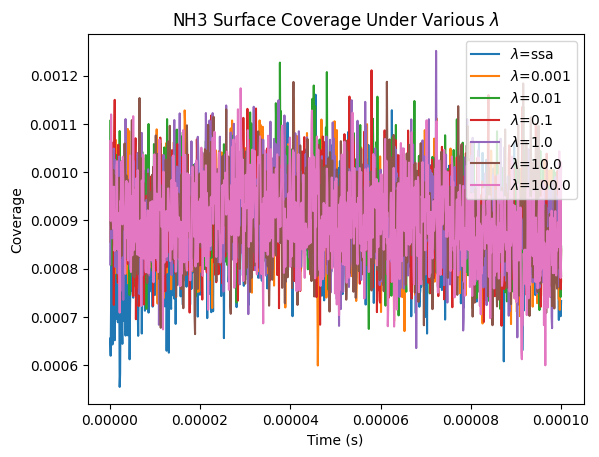

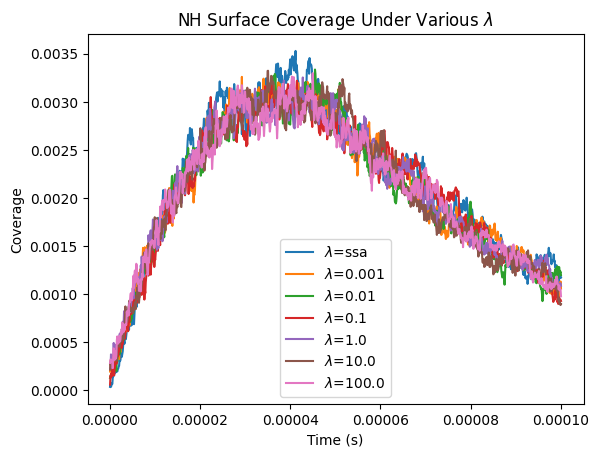

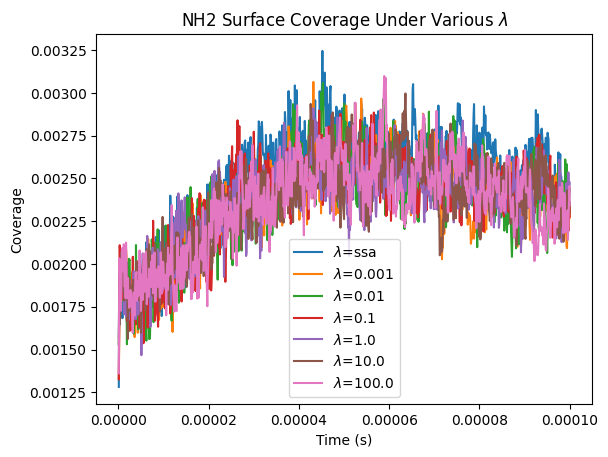

<Figure size 640x480 with 0 Axes>

In [4]:
for specie_idx in range(len(args.sim.species_names)):
    if args.sim._init_state[specie_idx] == 0: # ignore species that cannot stay on the surface
        continue

    for lbd in lambda_list: # for each lambda
        path = os.path.join(datapath, f"alg3_lambda_{lbd}")
        
        file_name = os.path.join(path, f"{algo}_size_{args.lattice_size}_sample_{args.num_samples}_{args.sim.species_names[specie_idx]}.txt")

        with open(file_name, 'r') as file:
            lines = file.readlines()

        for i, line in enumerate(lines): # read the list of coverages from file
            if "res in list" in line:
                list_line = lines[i+1]
                break
        try:
            result_list = eval(list_line)
        except Exception as e:
            print(f"error when evaluating list: {e}")

        for i, line in enumerate(lines): # read the list of timestamps from file
            if "time stamps in list" in line:
                list_line = lines[i+1]
                break
        try:
            timestamp_list = eval(list_line)
            # print(timestamp_list)
        except Exception as e:
            print(f"error when evaluating list: {e}")


        plt.plot(timestamp_list, result_list, label="$\lambda$="+lbd) # plot iteratively for each lambda

    plt.legend()
    sp_name = args.sim.species_names[specie_idx]
    sp_name = sp_name[:-2] if sp_name.endswith("_s") else sp_name

    # zoom in if necessary
    if sp_name == "E":
        plt.ylim(0.7, 0.75)
        plt.xlim(0.000004, 0.00000575)
    elif sp_name == "H":
        plt.ylim(0.08, 0.1)
        plt.xlim(0.0000014, 0.0000016)
    elif sp_name == "N":
        plt.ylim(0.01, 0.05)
        plt.xlim(0.0000004, 0.0000016)

    plt.title(f"{sp_name} Surface Coverage Under Various $\lambda$")
    plt.xlabel("Time (s)")
    plt.ylabel("Coverage")
    plt.savefig(os.path.join(savepath, f"{sp_name}_lambdas.pdf"))
    plt.show()
    plt.clf()